In [1]:
import pandas as pd 
import numpy as np

#scikit-learn KNN
from sklearn.neighbors import KNeighborsClassifier
#sckit learn random forest
from sklearn.ensemble import RandomForestClassifier
#sckit learn decision tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:

#import Defacement csv
df_Defacement = pd.read_csv('FinalDataset/Defacement.csv')
df_Defacement["URL_Type_obf_Type"] = df_Defacement["URL_Type_obf_Type"].replace(['benign'], 1)
df_Defacement["URL_Type_obf_Type"] = df_Defacement["URL_Type_obf_Type"].replace(['Defacement'], 0)
#change NaN value by O
#df_Defacement.fillna(0, inplace=True)
#compter le nombre de ligne contenant NaN
df_Defacement=df_Defacement.drop('Entropy_DirectoryName', axis=1)
#drop la clonne NumberRate_Extension
df_Defacement=df_Defacement.drop('NumberRate_Extension', axis=1)
print(df_Defacement.isnull().sum().tail(10))
df_Defacement.dropna(inplace = True)
print(df_Defacement.info())
# X and y
X = df_Defacement.drop('URL_Type_obf_Type', axis=1)
y = df_Defacement['URL_Type_obf_Type']

SymbolCount_Directoryname      0
SymbolCount_FileName           0
SymbolCount_Extension          0
SymbolCount_Afterpath          0
Entropy_URL                    0
Entropy_Domain                 0
Entropy_Filename             195
Entropy_Extension             31
Entropy_Afterpath              0
URL_Type_obf_Type              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15477 entries, 1 to 15710
Data columns (total 78 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      15477 non-null  int64  
 1   domain_token_count               15477 non-null  int64  
 2   path_token_count                 15477 non-null  int64  
 3   avgdomaintokenlen                15477 non-null  float64
 4   longdomaintokenlen               15477 non-null  int64  
 5   avgpathtokenlen                  15477 non-null  float64
 6   tld                              15477 non-null

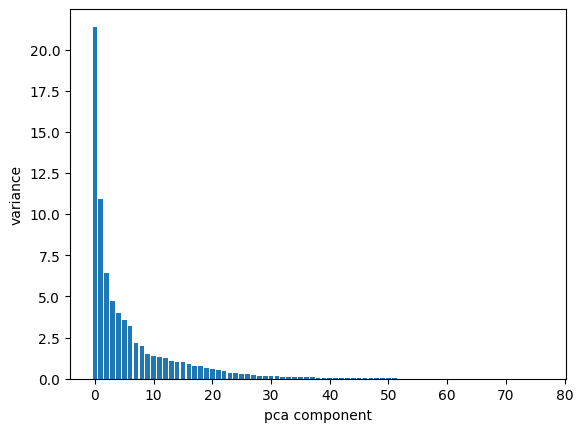

(15477, 77)
(15477, 13)


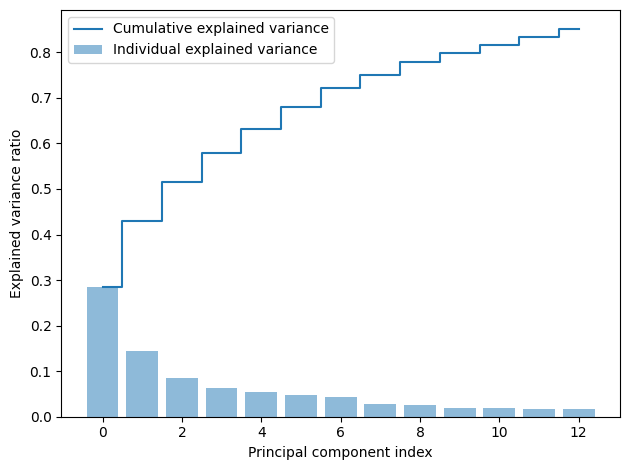

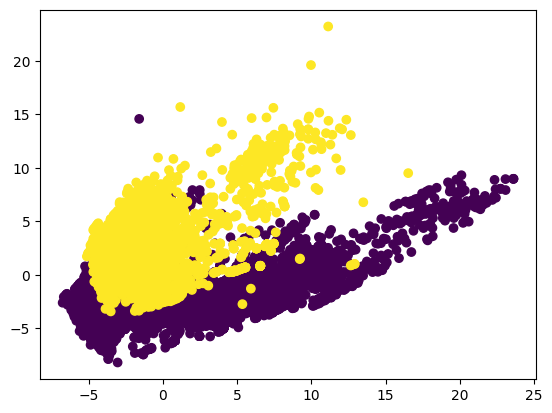

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

import numpy as np

scaler = StandardScaler()

pca = PCA()

pipeline = make_pipeline(scaler, pca)


pipeline.fit(X,y)

components = range(pca.n_components_)

plt.bar(components, pca.explained_variance_)
plt.xlabel("pca component")
plt.ylabel("variance")
plt.show()



#exo6

scaler=StandardScaler()
scaler.fit(X)
scaled_samples=scaler.transform(X)

pca = PCA(n_components=0.85)
pca.fit(scaled_samples)
pca_features = pca.transform(scaled_samples)

print(X.shape)
print(pca_features.shape)

exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
#plot pca
plt.scatter(pca_features[:,0], pca_features[:,1], c=y)
plt.show()


In [ ]:
#best parameters
""" KNN best parameter:  {'weights': 'uniform', 'n_neighbors': 2}
Random Forest best parameter:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
Decision Tree best parameter:  {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 40, 'criterion': 'gini'} """

In [3]:
#train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#fit
knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')
knn.fit(X_train, y_train)
#predict
y_pred_knn = knn.predict(X_test)

In [4]:
#RF
rf = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=50, bootstrap=True)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [5]:
#clf
clf = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=2, max_features='auto', max_depth=40, criterion='gini')
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [6]:
print("C4.5")
#accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred_clf))
#confusion matrix
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred_clf))
#classification report
print('Classification Report: ', classification_report(y_test, y_pred_clf))

C4.5
Accuracy:  0.9851421188630491
Confusion Matrix:  [[1524   19]
 [  27 1526]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.99      0.99      1543
           1       0.99      0.98      0.99      1553

    accuracy                           0.99      3096
   macro avg       0.99      0.99      0.99      3096
weighted avg       0.99      0.99      0.99      3096



In [7]:
print("knn")
#accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
#confusion matrix
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred_knn))
#classification report
print('Classification Report: ', classification_report(y_test, y_pred_knn))

knn
Accuracy:  0.9854651162790697
Confusion Matrix:  [[1533   10]
 [  35 1518]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.99      0.99      1543
           1       0.99      0.98      0.99      1553

    accuracy                           0.99      3096
   macro avg       0.99      0.99      0.99      3096
weighted avg       0.99      0.99      0.99      3096



In [8]:
print("rf")
#accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
#confusion matrix
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred_rf))
#classification report
print('Classification Report: ', classification_report(y_test, y_pred_rf))

rf
Accuracy:  0.998062015503876
Confusion Matrix:  [[1539    4]
 [   2 1551]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1543
           1       1.00      1.00      1.00      1553

    accuracy                           1.00      3096
   macro avg       1.00      1.00      1.00      3096
weighted avg       1.00      1.00      1.00      3096

